<a href="https://colab.research.google.com/github/chitoge729/BE_Project/blob/main/BE_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install statsmodels

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from itertools import product

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/chitoge729/Dataset/main/all_fuels_data_2023.csv")

In [5]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131


In [6]:
df.tail()

,ticker,commodity,date,open,high,low,close,volume
27295,BZ=F,Brent Crude Oil,2023-11-03,86.860001,87.779999,84.550003,84.889999,36172
27296,BZ=F,Brent Crude Oil,2023-11-06,85.389999,86.449997,84.910004,85.180000,26524
27297,BZ=F,Brent Crude Oil,2023-11-07,85.230003,85.320000,81.419998,81.610001,38007
27298,BZ=F,Brent Crude Oil,2023-11-08,81.470001,81.930000,79.160004,79.540001,36137
27299,BZ=F,Brent Crude Oil,2023-11-09,79.699997,80.669998,79.610001,80.559998,1009


In [7]:
df.isnull().sum()

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [8]:
df.shape

(27300, 8)

In [9]:
df.describe()

,open,high,low,close,volume
count,27300.000000,27300.000000,27300.000000,27300.000000,2.730000e+04
mean,27.113506,27.503700,26.698357,27.111346,1.056756e+05
std,36.011099,36.465119,35.523887,36.013934,1.492724e+05
min,-14.000000,0.507000,-40.320000,-37.630001,0.000000e+00
25%,2.013000,2.044000,1.981000,2.014275,2.617900e+04
50%,3.420500,3.500000,3.341000,3.419000,4.867900e+04
75%,53.759998,54.602499,52.865001,53.799999,1.131625e+05
max,146.080002,147.429993,144.270004,146.080002,2.288230e+06


<Axes: >

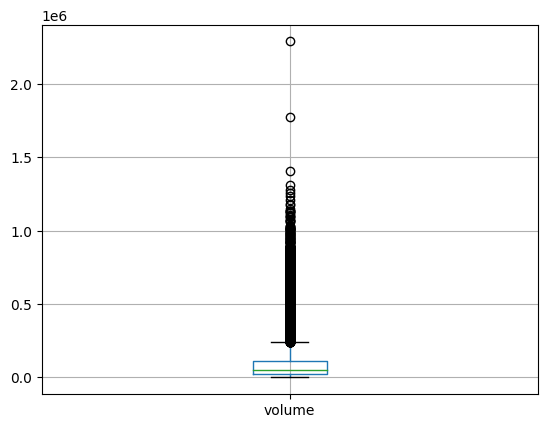

In [10]:
df.boxplot('volume')

In [11]:
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

outliers = df[(df['volume']<LL) | (df['volume'])>UL]
df_filtered = df[(df['volume'] >= LL) & (df['volume'] <= UL)]

<Axes: >

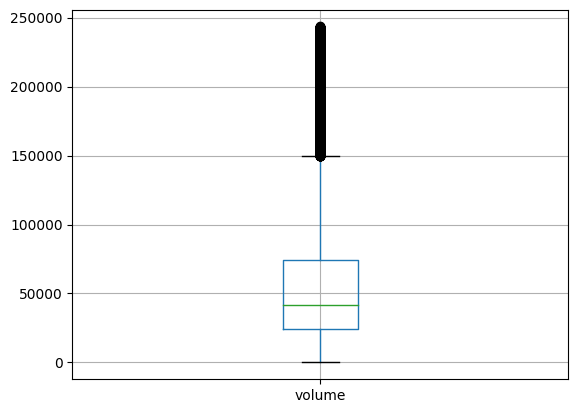

In [12]:
df_filtered.boxplot('volume')

In [13]:
SC = StandardScaler()

df_1 = df_filtered[['volume', 'open', 'high', 'low', 'close']]
df_2 = SC.fit_transform(df_1)

In [14]:
numeric_columns = df_filtered.select_dtypes(include=['number'])

In [15]:
df_standardized = df_filtered.copy()

In [16]:
df_standardized[numeric_columns.columns] = SC.fit_transform(numeric_columns)

In [17]:
df_standardized

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,0.319895,0.333081,0.332685,0.322660,0.401745
1,CL=F,Crude Oil,2000-08-24,0.318396,0.316484,0.316003,0.310076,0.278476
2,CL=F,Crude Oil,2000-08-25,0.312401,0.312334,0.313576,0.322660,-0.267493
3,CL=F,Crude Oil,2000-08-28,0.322592,0.336637,0.329955,0.347230,-0.225762
4,CL=F,Crude Oil,2000-08-29,0.345972,0.339898,0.351188,0.342736,-0.180337
...,...,...,...,...,...,...,...,...
27295,BZ=F,Brent Crude Oil,2023-11-03,1.965728,1.962573,1.928149,1.905907,-0.429666
27296,BZ=F,Brent Crude Oil,2023-11-06,1.921667,1.923154,1.939068,1.914596,-0.615292
27297,BZ=F,Brent Crude Oil,2023-11-07,1.916872,1.889664,1.833209,1.807628,-0.394361
27298,BZ=F,Brent Crude Oil,2023-11-08,1.804172,1.789191,1.764659,1.745604,-0.430339


<Axes: xlabel='volume', ylabel='Count'>

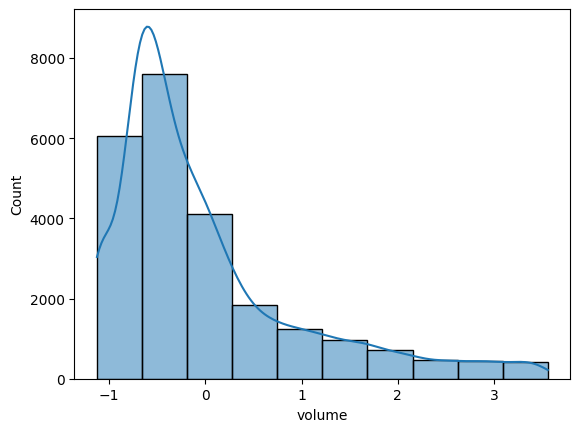

In [18]:
sns.histplot(df_standardized['volume'], bins=10, kde=True)

<Axes: xlabel='open', ylabel='Count'>

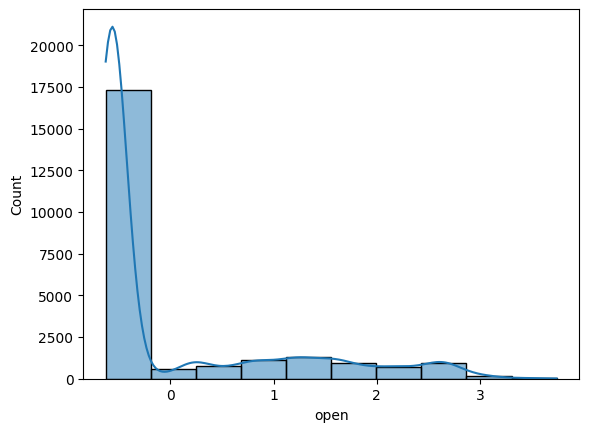

In [19]:
sns.histplot(df_standardized['open'], bins=10, kde=True)

<Axes: xlabel='high', ylabel='Count'>

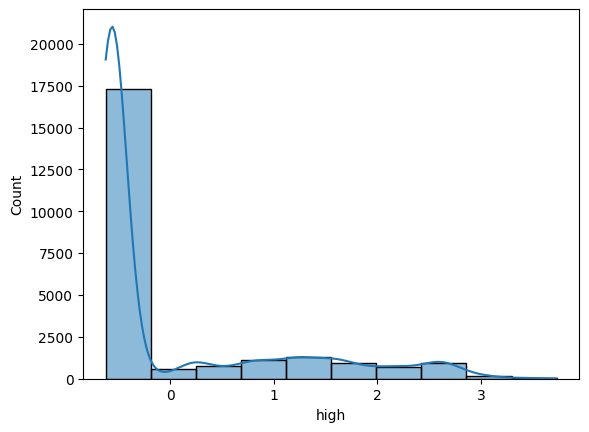

In [20]:
sns.histplot(df_standardized['high'], bins=10, kde=True)

<Axes: xlabel='low', ylabel='Count'>

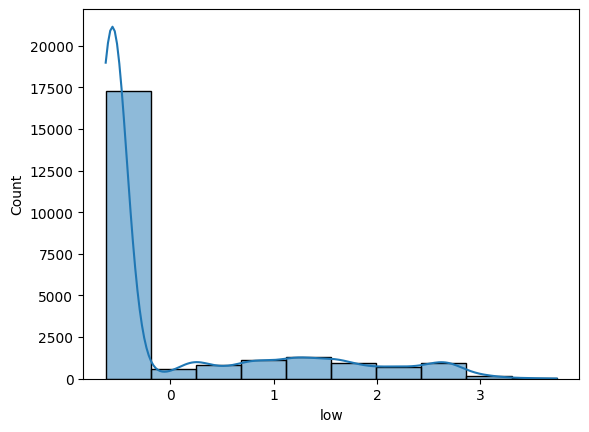

In [21]:
sns.histplot(df_standardized['low'], bins=10, kde=True)

<Axes: xlabel='close', ylabel='Count'>

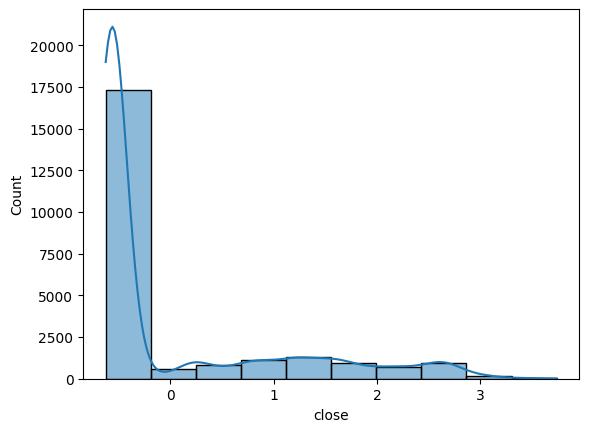

In [22]:
sns.histplot(df_standardized['close'], bins=10, kde=True)

In [23]:
df_standardized['date'] = pd.to_datetime(df_standardized['date'])

df_standardized['DayOfWeek'] = df_standardized['date'].dt.dayofweek
df_standardized['Month'] = df_standardized['date'].dt.month
df_standardized['Year'] = df_standardized['date'].dt.year

In [24]:
df_standardized

,ticker,commodity,date,open,high,low,close,volume,DayOfWeek,Month,Year
0,CL=F,Crude Oil,2000-08-23,0.319895,0.333081,0.332685,0.322660,0.401745,2,8,2000
1,CL=F,Crude Oil,2000-08-24,0.318396,0.316484,0.316003,0.310076,0.278476,3,8,2000
2,CL=F,Crude Oil,2000-08-25,0.312401,0.312334,0.313576,0.322660,-0.267493,4,8,2000
3,CL=F,Crude Oil,2000-08-28,0.322592,0.336637,0.329955,0.347230,-0.225762,0,8,2000
4,CL=F,Crude Oil,2000-08-29,0.345972,0.339898,0.351188,0.342736,-0.180337,1,8,2000
...,...,...,...,...,...,...,...,...,...,...,...
27295,BZ=F,Brent Crude Oil,2023-11-03,1.965728,1.962573,1.928149,1.905907,-0.429666,4,11,2023
27296,BZ=F,Brent Crude Oil,2023-11-06,1.921667,1.923154,1.939068,1.914596,-0.615292,0,11,2023
27297,BZ=F,Brent Crude Oil,2023-11-07,1.916872,1.889664,1.833209,1.807628,-0.394361,1,11,2023
27298,BZ=F,Brent Crude Oil,2023-11-08,1.804172,1.789191,1.764659,1.745604,-0.430339,2,11,2023


In [25]:
label_encoder = LabelEncoder()

df_standardized['Symbol_encoded'] = label_encoder.fit_transform(df_standardized['commodity'])

<ipython-input-26-c29c9e7e6366>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['commodity', 'open', 'high', 'low', 'close', 'volume']].corr()


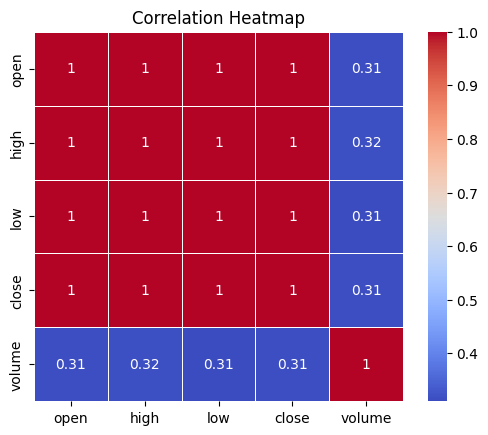

In [26]:
correlation_matrix = df[['commodity', 'open', 'high', 'low', 'close', 'volume']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)

plt.title('Correlation Heatmap')
plt.show()



In [27]:
df_standardized['commodity'].unique()

array(['Crude Oil', 'Heating Oil', 'Natural Gas', 'RBOB Gasoline',
       'Brent Crude Oil'], dtype=object)

In [28]:
df_standardized['commodity'].value_counts()

Heating Oil        5822
RBOB Gasoline      5783
Natural Gas        5692
Brent Crude Oil    4041
Crude Oil          2561
Name: commodity, dtype: int64

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Mean Squared Error: 0.18763872055888053


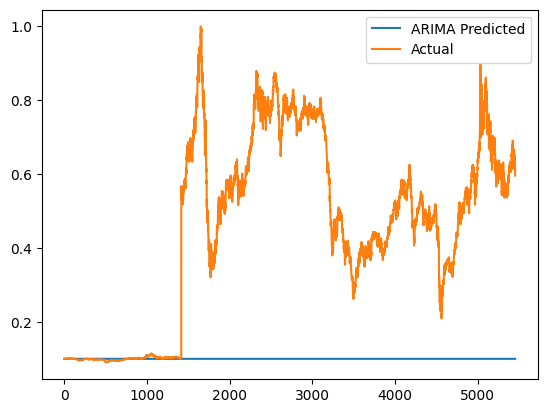

ARIMAX Mean Squared Error: 0.00015150311544954247


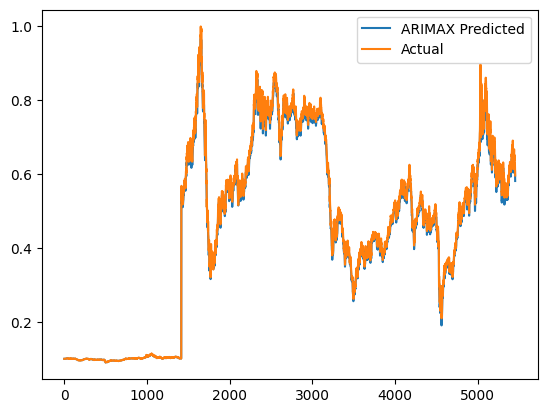

0.00015150311544954247

In [45]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# Function to evaluate ARIMA
def evaluate_arima(train_data, test_data, order):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data, predictions)
    print(f'ARIMA Mean Squared Error: {mse}')

    # Plot predictions
    plt.plot(predictions, label='ARIMA Predicted')
    plt.plot(test_data, label='Actual')
    plt.legend()
    plt.show()
    return mse

# Function to evaluate ARIMA with exogenous variable
def evaluate_arimax(train_data, test_data, order, exog_train, exog_test):
    # Check if exogenous variable is 2D
    if exog_train.ndim == 1:
        exog_train = exog_train.reshape(-1, 1)
    if exog_test.ndim == 1:
        exog_test = exog_test.reshape(-1, 1)

    model = ARIMA(train_data, order=order, exog=exog_train)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data), exog=exog_test)
    mse = mean_squared_error(test_data, predictions)
    print(f'ARIMAX Mean Squared Error: {mse}')

    # Plot predictions
    plt.plot(predictions, label='ARIMAX Predicted')
    plt.plot(test_data, label='Actual')
    plt.legend()
    plt.show()
    return mse

# Preprocessing
target_variable = 'open'
target_data = df[[target_variable]]
exog_variable = 'low'  # Use 'low' as exogenous variable

scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data)

# Set sequence length
sequence_length = 20

# Create sequences for training and testing
sequences = create_sequences(target_data_scaled, sequence_length)
train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

# Extract X_train, y_train, X_test, y_test
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Reshape for ARIMA model compatibility
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Create sequences for exogenous variable
exog_sequences = create_sequences(df[[exog_variable]].values, sequence_length)
exog_train, exog_test = exog_sequences[:train_size], exog_sequences[train_size:]

# Reshape exogenous variables if needed
exog_train = exog_train.reshape((exog_train.shape[0], exog_train.shape[1]))
exog_test = exog_test.reshape((exog_test.shape[0], exog_test.shape[1]))

# Grid search for ARIMA hyperparameters
best_order = (5, 1, 0)  # Example order, you may need to adjust
evaluate_arima(y_train, y_test, best_order)

# Train and evaluate ARIMAX model with best hyperparameters
evaluate_arimax(y_train, y_test, best_order, exog_train, exog_test)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Mean Squared Error: 0.22793232832448743


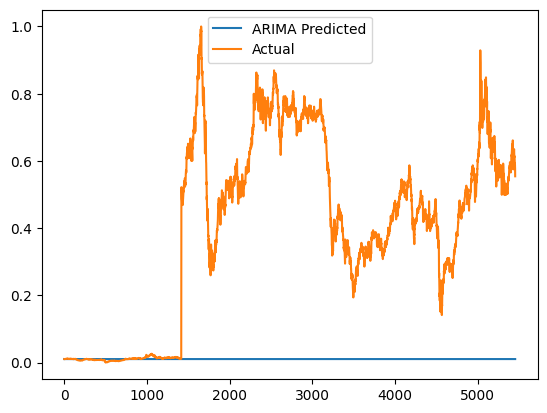

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX Mean Squared Error: 0.0024788938951333943


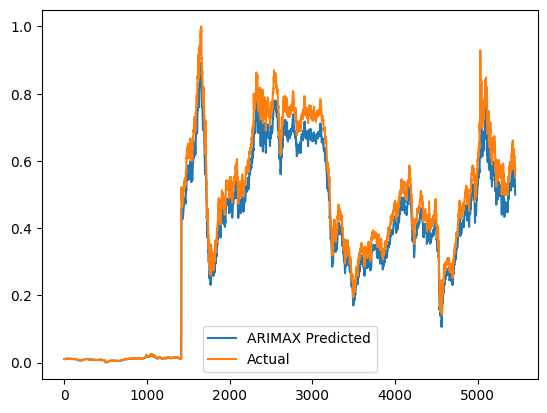

0.0024788938951333943

In [46]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# Function to evaluate ARIMA
def evaluate_arima(train_data, test_data, order):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data, predictions)
    print(f'ARIMA Mean Squared Error: {mse}')

    # Plot predictions
    plt.plot(predictions, label='ARIMA Predicted')
    plt.plot(test_data, label='Actual')
    plt.legend()
    plt.show()
    return mse

# Function to evaluate ARIMA with exogenous variable
def evaluate_arimax(train_data, test_data, order, exog_train, exog_test):
    # Check if exogenous variable is 2D
    if exog_train.ndim == 1:
        exog_train = exog_train.reshape(-1, 1)
    if exog_test.ndim == 1:
        exog_test = exog_test.reshape(-1, 1)

    model = ARIMA(train_data, order=order, exog=exog_train)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data), exog=exog_test)
    mse = mean_squared_error(test_data, predictions)
    print(f'ARIMAX Mean Squared Error: {mse}')

    # Plot predictions
    plt.plot(predictions, label='ARIMAX Predicted')
    plt.plot(test_data, label='Actual')
    plt.legend()
    plt.show()
    return mse

# Preprocessing
target_variable = 'high'
target_data = df[[target_variable]]
exog_variable = 'low'  # Use 'low' as exogenous variable

scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data)

# Set sequence length
sequence_length = 20

# Create sequences for training and testing
sequences = create_sequences(target_data_scaled, sequence_length)
train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

# Extract X_train, y_train, X_test, y_test
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Reshape for ARIMA model compatibility
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Create sequences for exogenous variable
exog_sequences = create_sequences(df[[exog_variable]].values, sequence_length)
exog_train, exog_test = exog_sequences[:train_size], exog_sequences[train_size:]

# Reshape exogenous variables if needed
exog_train = exog_train.reshape((exog_train.shape[0], exog_train.shape[1]))
exog_test = exog_test.reshape((exog_test.shape[0], exog_test.shape[1]))

# Grid search for ARIMA hyperparameters
best_order = (5, 1, 0)  # Example order, you may need to adjust
evaluate_arima(y_train, y_test, best_order)

# Train and evaluate ARIMAX model with best hyperparameters
evaluate_arimax(y_train, y_test, best_order, exog_train, exog_test)

ARIMA Mean Squared Error: 0.14248767528502918


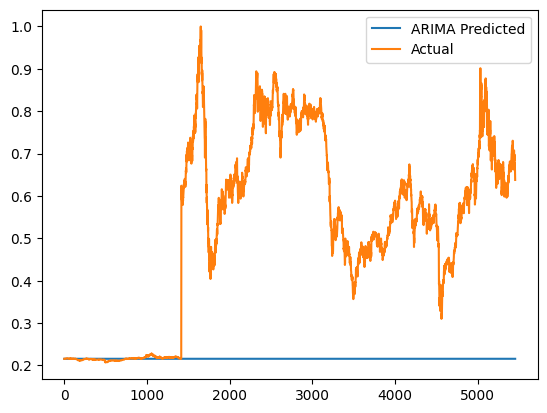

ARIMAX Mean Squared Error: 0.0008199251650643849


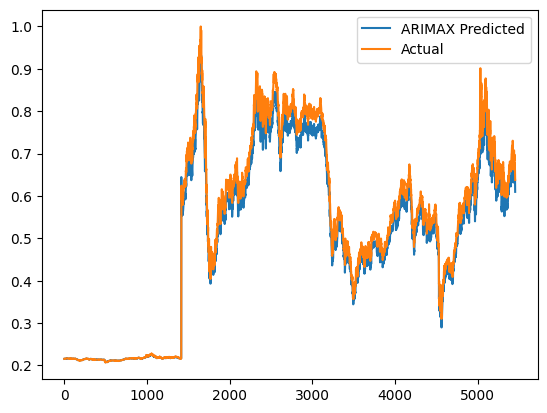

0.0008199251650643849

In [47]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# Function to evaluate ARIMA
def evaluate_arima(train_data, test_data, order):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data, predictions)
    print(f'ARIMA Mean Squared Error: {mse}')

    # Plot predictions
    plt.plot(predictions, label='ARIMA Predicted')
    plt.plot(test_data, label='Actual')
    plt.legend()
    plt.show()
    return mse

# Function to evaluate ARIMA with exogenous variable
def evaluate_arimax(train_data, test_data, order, exog_train, exog_test):
    # Check if exogenous variable is 2D
    if exog_train.ndim == 1:
        exog_train = exog_train.reshape(-1, 1)
    if exog_test.ndim == 1:
        exog_test = exog_test.reshape(-1, 1)

    model = ARIMA(train_data, order=order, exog=exog_train)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data), exog=exog_test)
    mse = mean_squared_error(test_data, predictions)
    print(f'ARIMAX Mean Squared Error: {mse}')

    # Plot predictions
    plt.plot(predictions, label='ARIMAX Predicted')
    plt.plot(test_data, label='Actual')
    plt.legend()
    plt.show()
    return mse

# Preprocessing
target_variable = 'close'
target_data = df[[target_variable]]
exog_variable = 'low'  # Use 'low' as exogenous variable

scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data)

# Set sequence length
sequence_length = 20

# Create sequences for training and testing
sequences = create_sequences(target_data_scaled, sequence_length)
train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

# Extract X_train, y_train, X_test, y_test
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Reshape for ARIMA model compatibility
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Create sequences for exogenous variable
exog_sequences = create_sequences(df[[exog_variable]].values, sequence_length)
exog_train, exog_test = exog_sequences[:train_size], exog_sequences[train_size:]

# Reshape exogenous variables if needed
exog_train = exog_train.reshape((exog_train.shape[0], exog_train.shape[1]))
exog_test = exog_test.reshape((exog_test.shape[0], exog_test.shape[1]))

# Grid search for ARIMA hyperparameters
best_order = (5, 1, 0)  # Example order, you may need to adjust
evaluate_arima(y_train, y_test, best_order)

# Train and evaluate ARIMAX model with best hyperparameters
evaluate_arimax(y_train, y_test, best_order, exog_train, exog_test)